In [ ]:
import cv2
import torch
from fer_pytorch.fer import FER

# Check OpenCV version
print(f"OpenCV version: {cv2.__version__}")

# Check Torch version
print(f"Torch version: {torch.__version__}")

# Initialize FER model and test
fer_model = FER()
print("FER model initialized successfully")

# Test FER on a sample image
img_path = 'path_to_your_image.jpg'  # Provide the path to a sample image file
img = cv2.imread(img_path)

if img is not None:
    result = fer_model.predict_image(img, show_top=True)
    print("Emotion prediction result:", result)
else:
    print("Failed to load image. Make sure the path is correct.")

# Simple PyTorch tensor test
x = torch.rand(5, 3)
print("Sample PyTorch tensor:\n", x)


In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

In [1]:
import torch
print(torch.cuda.is_available())  # Should return True if CUDA is available
print(torch.cuda.device_count())  # Should show the number of GPUs available


c:\Users\Moufid\anaconda3\envs\tf-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


True
1


In [2]:
import tensorflow as tf
print(tf.__version__)


2.11.0


In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib

In [ ]:
!pip cache purge


In [4]:
import os

# Path to the folder containing the videos
video_folder_path = "../datasets/dataset_video"

# Count the number of video files in the folder
video_files = [file for file in os.listdir(video_folder_path) if file.endswith('.mp4')]
total_videos = len(video_files)

print(f"Total videos in the folder: {total_videos}")


Total videos in the folder: 7360


In [3]:
import os
import pandas as pd

# Path to the dataset directory
video_dataset_path = "../datasets/dataset_video"  # Define your dataset path here

def load_video_metadata(dataset_path):
    """
    Load metadata for videos in the dataset directory.
    """
    video_files = [f for f in os.listdir(dataset_path) if f.endswith('.mp4')]
    metadata = []
    for video in video_files:
        try:
            parts = video.split('_')
            file_id = parts[0]
            scene = parts[1]
            emotion = parts[2]
            metadata.append({'Filename': video, 'ID': file_id, 'Scene': scene, 'Emotion': emotion})
        except IndexError:
            print(f"Skipping malformed filename: {video}")
    df = pd.DataFrame(metadata)
    return df

# Load the metadata
metadata_df = load_video_metadata(video_dataset_path)
print("Metadata Loaded:\n", metadata_df.head())


Metadata Loaded:
               Filename    ID Scene Emotion
0  1002_DFA_ANG_XX.mp4  1002   DFA     ANG
1  1002_DFA_DIS_XX.mp4  1002   DFA     DIS
2  1002_DFA_FEA_XX.mp4  1002   DFA     FEA
3  1002_DFA_HAP_XX.mp4  1002   DFA     HAP
4  1002_DFA_NEU_XX.mp4  1002   DFA     NEU


Dataset Shape: (7360, 4)
First Few Rows:
               Filename    ID Scene Emotion
0  1002_DFA_ANG_XX.mp4  1002   DFA     ANG
1  1002_DFA_DIS_XX.mp4  1002   DFA     DIS
2  1002_DFA_FEA_XX.mp4  1002   DFA     FEA
3  1002_DFA_HAP_XX.mp4  1002   DFA     HAP
4  1002_DFA_NEU_XX.mp4  1002   DFA     NEU

Emotion Distribution:
 Emotion
ANG    1257
DIS    1257
FEA    1257
HAP    1257
SAD    1257
NEU    1075
Name: count, dtype: int64


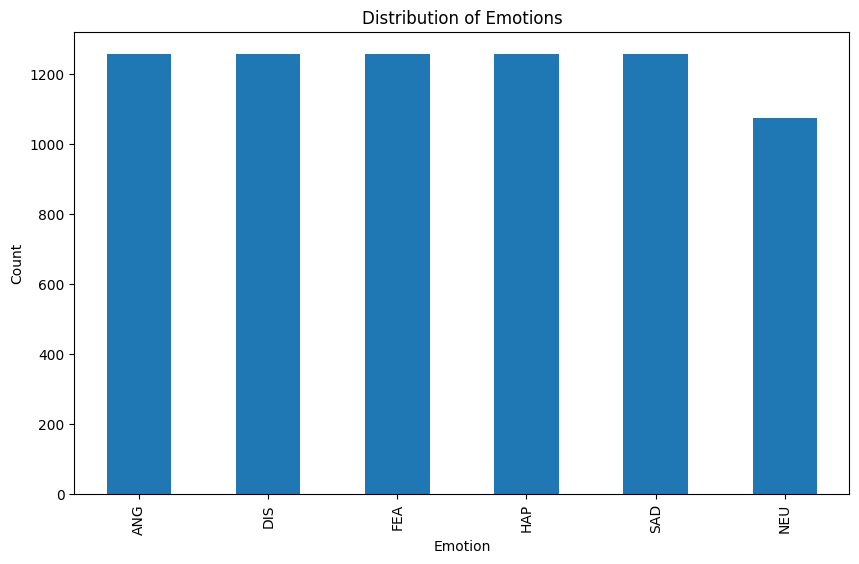

In [4]:
import matplotlib.pyplot as plt

def perform_eda(df):
    """
    Perform Exploratory Data Analysis (EDA) on the dataset.
    """
    print("Dataset Shape:", df.shape)
    print("First Few Rows:\n", df.head())
    print("\nEmotion Distribution:\n", df['Emotion'].value_counts())
    
    # Plot the distribution of emotions
    plt.figure(figsize=(10, 6))
    df['Emotion'].value_counts().plot(kind='bar')
    plt.title("Distribution of Emotions")
    plt.xlabel("Emotion")
    plt.ylabel("Count")
    plt.show()

# Perform EDA on metadata
perform_eda(metadata_df)


In [ ]:
!pip install scikit-learn

In [5]:
from sklearn.model_selection import train_test_split
from collections import Counter

def split_dataset(df, test_size=0.2, val_size=0.1, random_state=42):
    """
    Split the dataset into training, validation, and testing sets with balanced emotion distribution.
    """
    train_val_df, test_df = train_test_split(
        df, test_size=test_size, stratify=df['Emotion'], random_state=random_state
    )
    
    train_df, val_df = train_test_split(
        train_val_df, test_size=val_size, stratify=train_val_df['Emotion'], random_state=random_state
    )
    
    print("\nSplit Summary:")
    print("Training Set:", Counter(train_df['Emotion']))
    print("Validation Set:", Counter(val_df['Emotion']))
    print("Testing Set:", Counter(test_df['Emotion']))
    
    return train_df, val_df, test_df

# Split dataset
train_df, val_df, test_df = split_dataset(metadata_df)



Split Summary:
Training Set: Counter({'FEA': 905, 'DIS': 905, 'SAD': 905, 'ANG': 905, 'HAP': 905, 'NEU': 774})
Validation Set: Counter({'FEA': 101, 'DIS': 101, 'SAD': 101, 'ANG': 100, 'HAP': 100, 'NEU': 86})
Testing Set: Counter({'HAP': 252, 'ANG': 252, 'FEA': 251, 'SAD': 251, 'DIS': 251, 'NEU': 215})


In [ ]:
print(train_df.columns)


In [ ]:
import os
import shutil

def save_videos_to_folders(train_df, val_df, test_df, video_dir, output_dir):
    """
    Save training, validation, and testing videos into separate folders.

    Args:
        train_df (pd.DataFrame): DataFrame for training set.
        val_df (pd.DataFrame): DataFrame for validation set.
        test_df (pd.DataFrame): DataFrame for testing set.
        video_dir (str): Path to the folder containing the original videos.
        output_dir (str): Path to the folder where splits will be saved.
    """
    # Create output folders for training, validation, and testing sets
    train_folder = os.path.join(output_dir, "Training_Set")
    val_folder = os.path.join(output_dir, "Validation_Set")
    test_folder = os.path.join(output_dir, "Testing_Set")
    
    for folder in [train_folder, val_folder, test_folder]:
        if not os.path.exists(folder):
            os.makedirs(folder)
    
    # Helper function to copy videos
    def copy_videos(df, target_folder):
        for _, row in df.iterrows():
            video_file = row['Filename']  # Corrected column name
            src_path = os.path.join(video_dir, video_file)
            dest_path = os.path.join(target_folder, video_file)
            if os.path.exists(src_path):
                shutil.copy(src_path, dest_path)
            else:
                print(f"Video not found: {src_path}")

    # Copy videos into respective folders
    print("Copying training videos...")
    copy_videos(train_df, train_folder)
    
    print("Copying validation videos...")
    copy_videos(val_df, val_folder)
    
    print("Copying testing videos...")
    copy_videos(test_df, test_folder)
    
    print(f"Videos have been split and saved into {output_dir}.")

# Paths
video_dir = r"D:\CSC\7-seventh semester\grad pro\grad\AI04-Grad\datasets\dataset_video"  
output_dir = r"D:\CSC\7-seventh semester\grad pro\grad\AI04-Grad\videoRecognition"  

# Call the function
save_videos_to_folders(train_df, val_df, test_df, video_dir, output_dir)


In [ ]:
def save_splits(train_df, val_df, test_df, output_dir):
    """
    Save training, validation, and testing splits to CSV files.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    train_df.to_csv(os.path.join(output_dir, "train_split.csv"), index=False)
    val_df.to_csv(os.path.join(output_dir, "val_split.csv"), index=False)
    test_df.to_csv(os.path.join(output_dir, "test_split.csv"), index=False)
    print("\nSplits saved to:", output_dir)

# Save splits
output_dir = "../videoRecognition"
save_splits(train_df, val_df, test_df, output_dir)


### eda on the training and testing file

In [ ]:
print("Columns in train_df:", train_df.columns.tolist())
print("Columns in val_df:", val_df.columns.tolist())
print("Columns in test_df:", test_df.columns.tolist())


In [ ]:
print(train_df.head())


In [ ]:
def check_duplicates_and_missing(df):
    """
    Check for duplicate or missing entries in the dataset.

    Args:
        df (pd.DataFrame): The dataset.

    Returns:
        pd.DataFrame: DataFrame without duplicates or missing values.
    """
    print("Initial rows:", df.shape[0])
    df = df.drop_duplicates()
    print("After removing duplicates:", df.shape[0])
    df = df.dropna()
    print("After removing missing values:", df.shape[0])
    return df

# Clean dataset
train_df = check_duplicates_and_missing(train_df)


In [ ]:
import cv2
import torch

def extract_frames(video_path, num_frames=16):
    """
    Extract a fixed number of frames from a video.

    Args:
        video_path (str): Path to the video file.
        num_frames (int): Number of frames to extract.

    Returns:
        List of frames (each frame as a NumPy array).
    """
    cap = cv2.VideoCapture(video_path)
    frames = []
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Choose evenly spaced frame indices
    frame_indices = torch.linspace(0, total_frames - 1, num_frames).long()
    
    for idx in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx.item())
        success, frame = cap.read()
        if success:
            frames.append(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))  # Convert to RGB
        else:
            break
    cap.release()
    return frames


In [ ]:
train_dataset.preprocess_all()


In [ ]:
import os

preprocessed_files = os.listdir("D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Preprocessed_Training_Set")
print(f"Total preprocessed files: {len(preprocessed_files)}")


In [7]:
import os

# Path to the folder containing the videos
video_folder_path = "../videoRecognition/Training_Set"

# Count the number of video files in the folder
video_files = [file for file in os.listdir(video_folder_path) if file.endswith('.mp4')]
total_videos = len(video_files)

print(f"Total videos in the folder: {total_videos}")


Total videos in the folder: 5299


In [ ]:
import torch

# Load the tensor
tensor = torch.load("D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Preprocessed_Training_Set/1002_DFA_ANG_XX.pt")

# Check tensor details
print(f"Tensor shape: {tensor.shape}")
print(f"Tensor type: {tensor.dtype}")


In [ ]:
!pip3 install torch==1.13.1+cu117 torchvision>=0.13.1+cu117 torchaudio>=0.13.1+cu117 --extra-index-url https://download.pytorch.org/whl/cu117 --no-cache-dir 

In [ ]:
!pip install decord moviepy deepface -q


In [ ]:
!pip cache purge


In [ ]:
!pip show moviepy


In [ ]:
!pip cache purge


In [ ]:
!pip install moviepy


In [ ]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
!pip install tensorflow-gpu


In [ ]:
import decord
from deepface import DeepFace
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2

In [14]:
import os
import pandas as pd
import decord
from deepface import DeepFace
import tensorflow as tf

# Ensure TensorFlow is using GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available and will be used.")
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("GPU is not available. Falling back to CPU.")

# Define the directories for your video sets
video_dirs = [
    "D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Training_Set",
    "D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Validation_Set",
    "D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Testing_Set"
]

# Define the output path for aggregated results
output_path = "D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/aggregated_emotion_analysis.csv"

# Parameters
frame_interval = 30  # Process every nth frame to reduce data volume
subset_percentage = 40  # Percentage of videos to sample from each directory

# Initialize a list to store aggregated results
video_emotion_results = []

# Function to process a subset of videos
def process_videos(video_dir, subset_percentage):
    print(f"Processing videos from: {video_dir}")
    
    # Get all video file paths in the directory (only .mp4 files)
    file_paths = [os.path.join(video_dir, f) for f in os.listdir(video_dir) if f.endswith(".mp4")]
    print(f"Total videos in {video_dir}: {len(file_paths)}")
    
    # Sample a subset of videos
    subset_count = max(1, int(len(file_paths) * subset_percentage / 100))  # Ensure at least 1 video is selected
    sampled_files = file_paths[:subset_count]  # Take the first `subset_count` videos (or shuffle for randomness)
    print(f"Processing a subset of {subset_count} videos from {video_dir}")
    
    # Process each video file
    for video_path in sampled_files:
        print(f"Processing video: {video_path}")
        
        try:
            # Load video with Decord
            video_reader = decord.VideoReader(video_path)
            num_frames = len(video_reader)
            print(f"Total frames in video: {num_frames}")
            
            # Initialize emotion scores for aggregation
            video_emotions = {"neutral": [], "happy": [], "sad": [], "angry": [], "fear": [], "disgust": [], "surprise": []}
            
            # Process video frames (sample every nth frame)
            for i in range(0, num_frames, frame_interval):
                try:
                    frame = video_reader[i].asnumpy()  # Extract frame as a numpy array
                    print(f"Processing frame {i}/{num_frames} in {video_path}")

                    # Perform emotion analysis on the frame
                    res = DeepFace.analyze(
                        frame, 
                        actions=['emotion'], 
                        enforce_detection=False,
                        detector_backend='opencv'  # Optional: Specify backend
                    )[0]
                    print(f"Emotion analysis result for frame {i}: {res['emotion']}")

                    # Store emotion scores
                    for emotion, score in res['emotion'].items():
                        video_emotions[emotion].append(score)

                except Exception as e:
                    print(f"Error processing frame {i} in video {video_path}: {e}")
            
            # Check if any emotions were detected
            if all(len(scores) == 0 for scores in video_emotions.values()):
                print(f"No emotions detected for video: {video_path}")
                continue
            
            # Aggregate emotion scores for the video
            aggregated_result = {
                "video_path": video_path,
                "dominant_emotion": max(video_emotions, key=lambda e: sum(video_emotions[e])),
                "average_emotion_scores": {emotion: sum(scores) / len(scores) if scores else 0 
                                           for emotion, scores in video_emotions.items()}
            }
            video_emotion_results.append(aggregated_result)
            print(f"Aggregated result for video: {aggregated_result}")

        except Exception as e:
            print(f"Error processing video {video_path}: {e}")

# Process videos in each directory
for video_dir in video_dirs:
    process_videos(video_dir, subset_percentage)

# Check if there are results to save
if len(video_emotion_results) == 0:
    print("No results to save. Ensure videos contain detectable faces.")
else:
    # Save aggregated results to CSV
    df_aggregated = pd.DataFrame(video_emotion_results)
    print("Final DataFrame:")
    print(df_aggregated)
    df_aggregated.to_csv(output_path, index=False)
    print(f"Aggregated results saved to {output_path}")
print("Processing complete.")


GPU is not available. Falling back to CPU.
Processing videos from: D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Training_Set
Total videos in D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Training_Set: 5299
Processing a subset of 2119 videos from D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Training_Set
Processing video: D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Training_Set\1002_DFA_ANG_XX.mp4
Total frames in video: 77
Processing frame 0/77 in D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Training_Set\1002_DFA_ANG_XX.mp4
Emotion analysis result for frame 0: {'angry': 0.1260872115381062, 'disgust': 5.635757485689119e-10, 'fear': 0.0852250901516527, 'happy': 0.001386953954352066, 'sad': 0.33578695729374886, 'surprise': 0.005373420935939066, 'neutral': 99.44614171981812}
Processing frame 30/77 in D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/Training_Set\1002_DFA_ANG_XX.mp4
Emotion analysis res

In [36]:
# Load the aggregated data
df = pd.read_csv("D:/CSC/7-seventh semester/GP/grad/AI04-Grad/videoRecognition/aggregated_emotion_analysis.csv")

# Filter data based on file paths
df_train = df[df['video_path'].str.contains("Training_Set")]
df_val = df[df['video_path'].str.contains("Validation_Set")]
df_test = df[df['video_path'].str.contains("Testing_Set")]

print(f"Training set size: {len(df_train)}")
print(f"Validation set size: {len(df_val)}")
print(f"Testing set size: {len(df_test)}")


Training set size: 2119
Validation set size: 235
Testing set size: 588
